Step 1: Data Loading and Preprocessing

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/bmi.csv')

# Display first few rows
print(df.head())

# Drop any missing values (if any)
df.dropna(inplace=True)

# Extract features (assuming relevant columns are 'Weight', 'Height', etc.)
X = df[['Weight', 'Height']].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   Age  Height  Weight        Bmi       BmiClass
0   61    1.85  109.30  31.935720  Obese Class 1
1   60    1.71   79.02  27.023700     Overweight
2   60    1.55   74.70  31.092612  Obese Class 1
3   60    1.46   35.90  16.841809    Underweight
4   60    1.58   97.10  38.896010  Obese Class 2


Step 2: Model Training (K-Means Clustering)

In [27]:
from sklearn.cluster import KMeans

# Set random seed and train KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Predict cluster labels
labels = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_

print("Cluster Centers:\n", centers)


Cluster Centers:
 [[-0.12988183  0.26432505]
 [ 1.97719564  0.90637795]
 [-0.90329608 -1.49290571]]


Step 3: Evaluation Using MSE

In [28]:
from sklearn.metrics import mean_squared_error

# Calculate MSE between each point and its assigned cluster center
mse = mean_squared_error(X_scaled, kmeans.cluster_centers_[labels])
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.347867086210254


 Step 4: Visualization

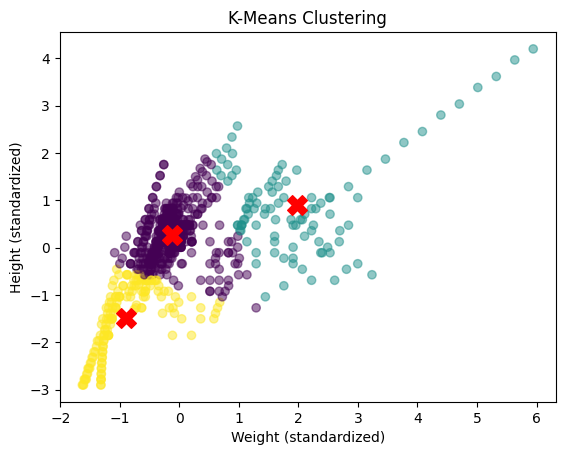

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='X', s=200)
plt.xlabel('Weight (standardized)')
plt.ylabel('Height (standardized)')
plt.title('K-Means Clustering')
plt.show()


Conclusion


In this project, we applied K-Means clustering on a dataset containing age, height, weight, and BMI information. After standardizing the height and weight values, the algorithm grouped the data into three meaningful clusters. These clusters likely represent different body types such as underweight, overweight, and obese, based on the natural separation in the data. The calculated cluster centers highlight how individuals with similar physical characteristics are grouped together. The Mean Squared Error (MSE) of 0.3479 indicates that the clustering model performed well, with data points closely aligned to their respective cluster centers. The scatter plot visualization also confirms the effectiveness of clustering, showing clearly separated groups and distinct centroids. Overall, the project shows how unsupervised learning techniques like K-Means can help identify patterns in health-related data even without labeled categories.

